In [21]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import kagglehub

path = kagglehub.dataset_download("nanditapore/healthcare-diabetes")

print("Path to dataset files:", path)
csv_file = None
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_file = os.path.join(path, file)
        break

if csv_file is None:
    print("No CSV file found in the directory.")
else:
    print(f"Found CSV file: {csv_file}")

100%|██████████████████████████████████████████████████████████████████████████████████████| 26.7k/26.7k [00:00<00:00, 258kB/s]

Extracting files...
Path to dataset files: C:\Users\keert\.cache\kagglehub\datasets\nanditapore\healthcare-diabetes\versions\1
Found CSV file: C:\Users\keert\.cache\kagglehub\datasets\nanditapore\healthcare-diabetes\versions\1\Healthcare-Diabetes.csv


In [3]:
df = pd.read_csv(csv_file, delimiter=',')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB
None


In [6]:
df.drop('Id',axis=1, inplace=True)

In [7]:
X_df=df.drop('Outcome',axis=1)
Y_df=df['Outcome']

In [11]:
X_df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age
2            81       72             15             76       30.1  0.547                     25     7
0            173      78             32             265      46.5  1.159                     58     6
6            154      74             32             193      29.3  0.839                     39     6
8            194      80             0              0        26.1  0.551                     67     6
2            83       65             28             66       36.8  0.629                     24     6
                                                                                                   ..
3            78       50             32             88       31.0  0.248                     26     1
9            119      80             35             0        29.0  0.263                     29     1
8            183      64             0              0        23.3  0.672               

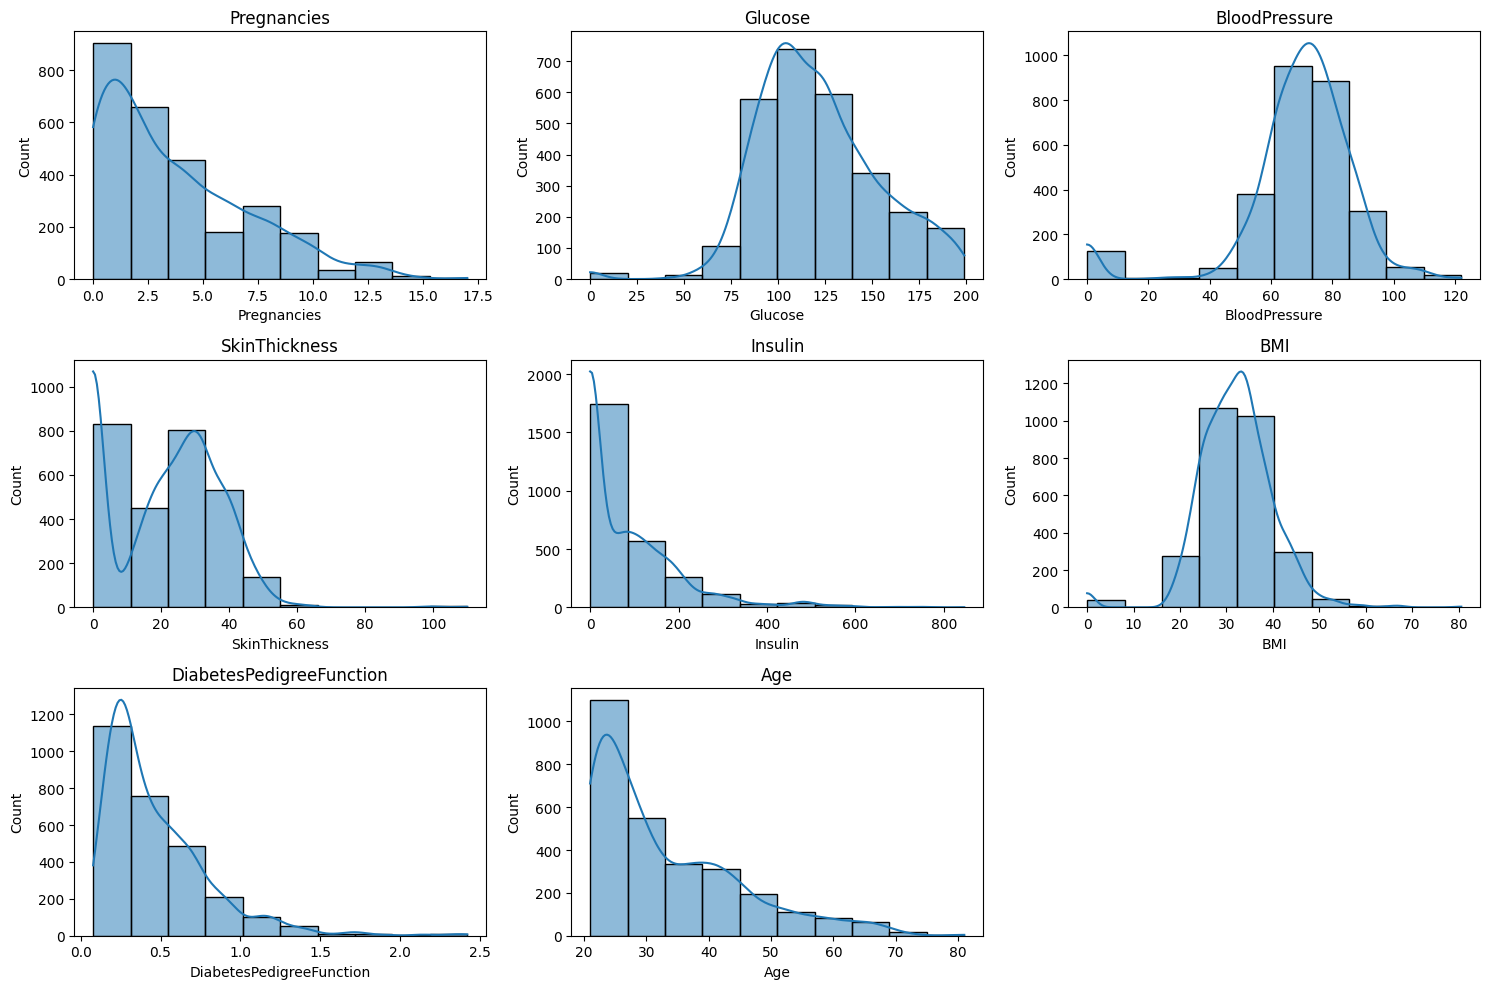

In [17]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, column in enumerate(X_df.columns):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.histplot(X_df[column], bins=10, kde=True)  # Add kde=True for kernel density estimate
    plt.title(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

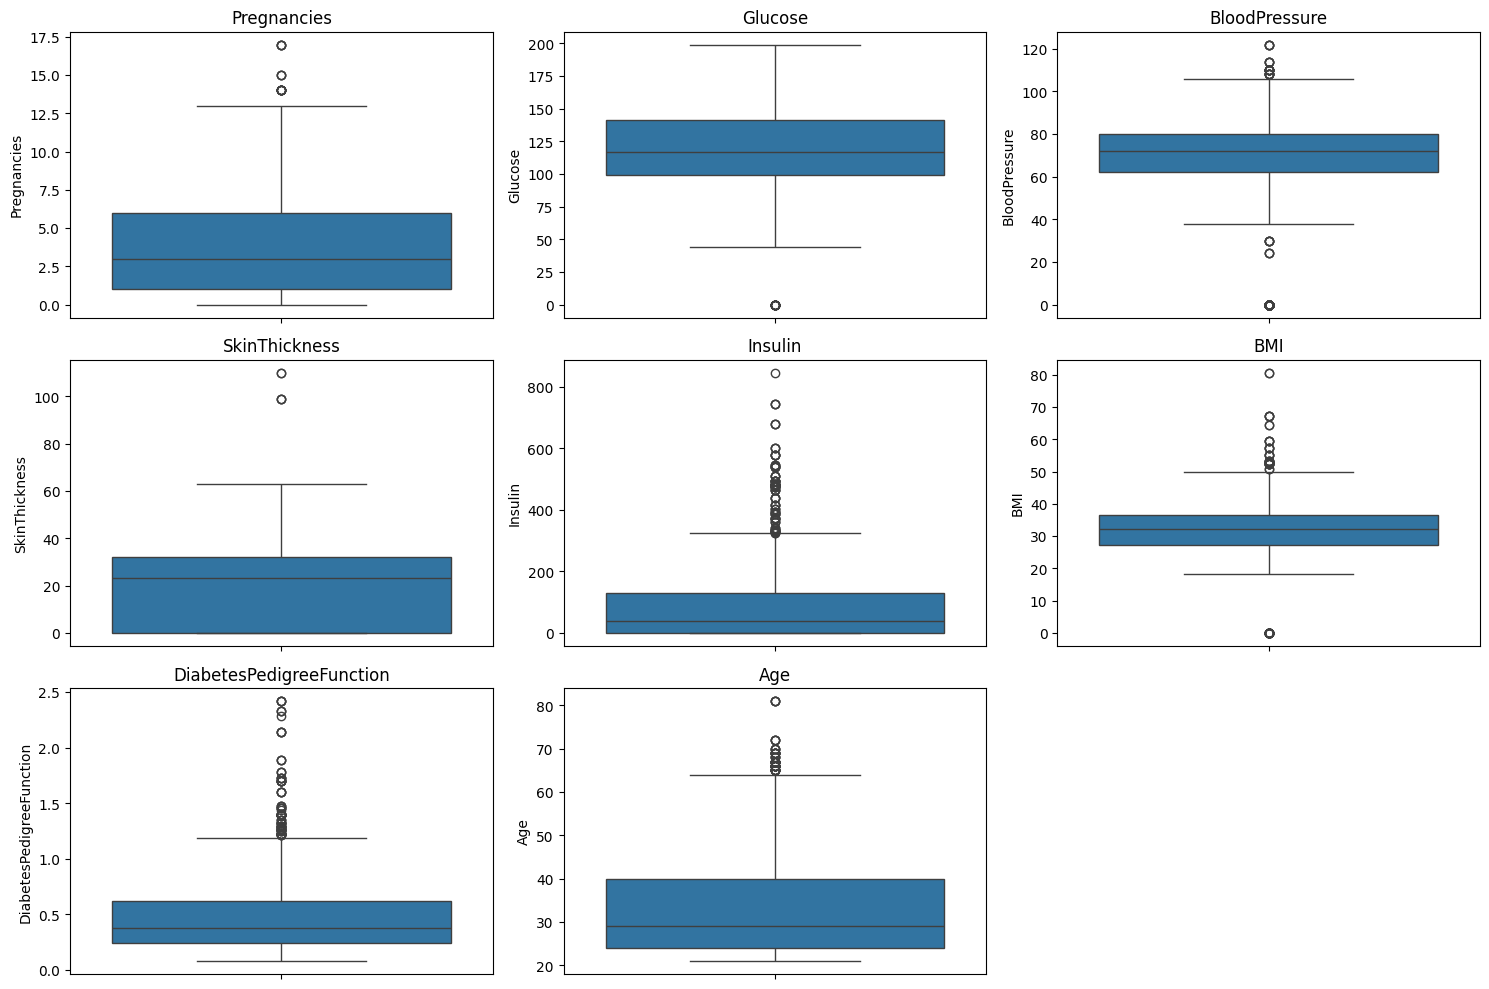

In [15]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create box plots for each feature
for i, column in enumerate(X_df.columns):
    plt.subplot(3, 3, i + 1)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=X_df[column])
    plt.title(column)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<h1>Handling Outliers</h1>

Feature	Typical Range	Potential Outliers\
Pregnancies	0 - 10	Above 10 pregnancies may be outliers.\
Glucose	70 - 140 mg/dL	Below 60 or above 300-400 mg/dL may be outliers.\
Blood Pressure	60 - 80 mm Hg	Below 50 or above 110 mm Hg may be outliers.\
Skin Thickness	10 - 50 mm	Below 10 or above 60 mm may be outliers.\
Insulin	16 - 166 mu U/mL	Below 16 or above 300-400 mu U/mL may be outliers.\
BMI	18.5 - 24.9 kg/m²	Below 15 or above 50 kg/m² may be outliers.\
Diabetes Pedigree Function	0.2 - 1.0	Above 1.5 may be outliers.


In [20]:
import pandas as pd

# Assuming your dataset is loaded into the DataFrame 'df'

# Define acceptable ranges for each feature
feature_ranges = {
    'Pregnancies': (0, 10),  # Range for Pregnancies: 0 - 10
    'Glucose': (70, 300),    # Range for Glucose: 70 - 300 mg/dL
    'BloodPressure': (60, 110),  # Range for Blood Pressure: 60 - 110 mm Hg
    'SkinThickness': (10, 60),  # Range for Skin Thickness: 10 - 60 mm
    'Insulin': (16, 300),    # Range for Insulin: 16 - 300 mu U/mL
    'BMI': (15, 50),         # Range for BMI: 15 - 50 kg/m²
    'DiabetesPedigreeFunction': (0.2, 1.5)  # Range for Diabetes Pedigree Function: 0.2 - 1.5
}

# Apply clipping to each feature based on the provided ranges
for feature, (min_val, max_val) in feature_ranges.items():
    X_df[feature] = X_df[feature].clip(lower=min_val, upper=max_val)

# Display the first few rows to verify the changes
X_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,16,33.6,0.627,50
1,1,85,66,29,16,26.6,0.351,31
2,8,183,64,10,16,23.3,0.672,32
3,1,89,66,23,94,28.1,0.200,21
4,0,137,60,35,168,43.1,1.500,33


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42)
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Use more iterations if necessary

# Train the model on the training data
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
# Predict the outcomes on the test data
y_pred = lr_model.predict(X_test)


Confusion Matrix:
[[329  38]
 [ 86 101]]


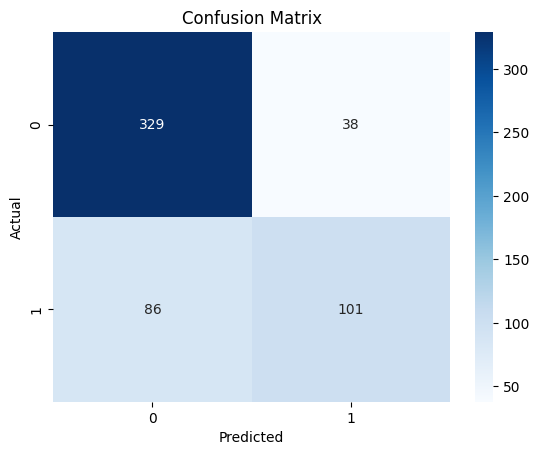

In [24]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix using seaborn heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report for precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 77.62%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       367
           1       0.73      0.54      0.62       187

    accuracy                           0.78       554
   macro avg       0.76      0.72      0.73       554
weighted avg       0.77      0.78      0.77       554

